In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats

from model import *

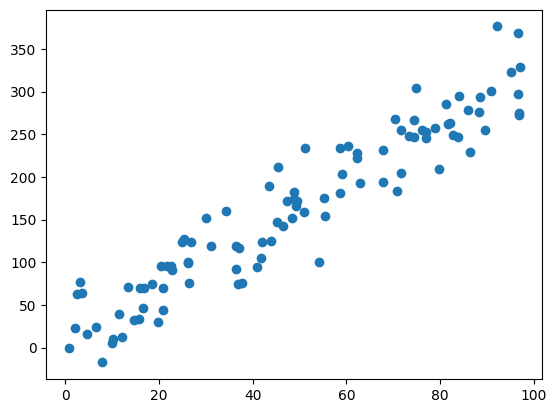

In [2]:
n = 100
np.random.seed(15)

b0, b1 = 8, 3.2
e = np.random.normal(0,30, n)

X = np.random.uniform(0, 100, n)
y = b0 + b1*X + e

plt.plot(X, y, marker='o', linestyle='');

In [4]:
lr = LinearRegressionClosedFormModel()
lr.fit(X, y)
y_hat = lr.predict(X)

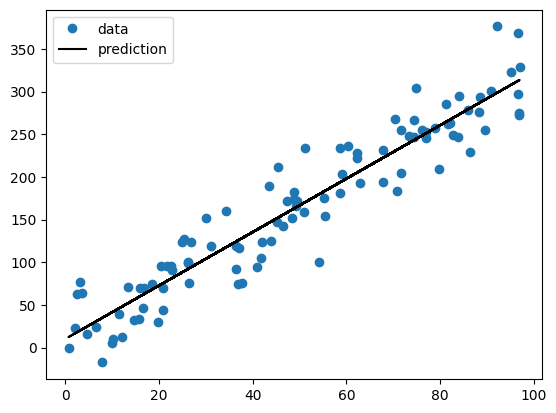

In [5]:
plt.plot(X, y, marker='o', linestyle='', label='data')
plt.plot(X, y_hat, color='k', marker='', linestyle='-', label='prediction')
plt.legend();

R2: 89.7%


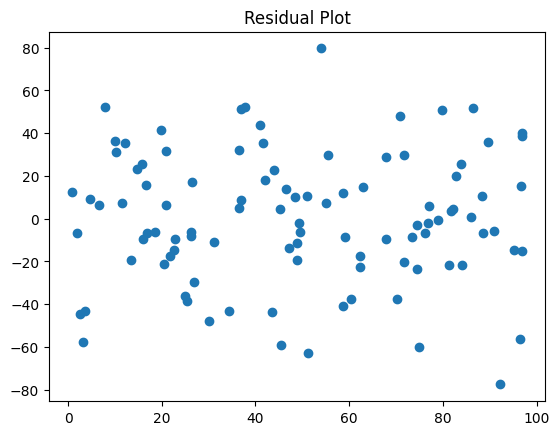

In [6]:
lr.evaluate(y, y_hat)

plt.plot(X, y_hat - y, marker='o', linestyle='')
plt.title('Residual Plot');

R2: 89.7%


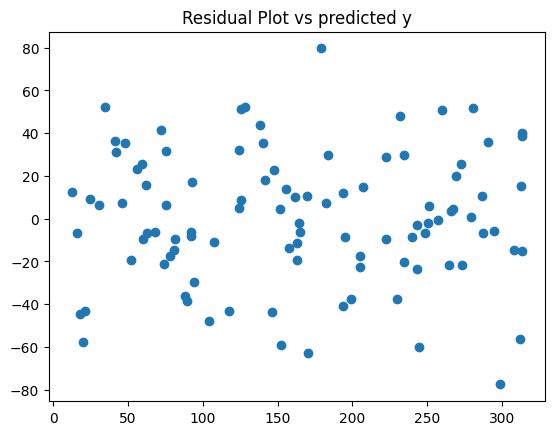

In [7]:
lr.evaluate(y, y_hat)
plt.plot(y_hat, y_hat - y, marker='o', linestyle='')
plt.title('Residual Plot vs predicted y');

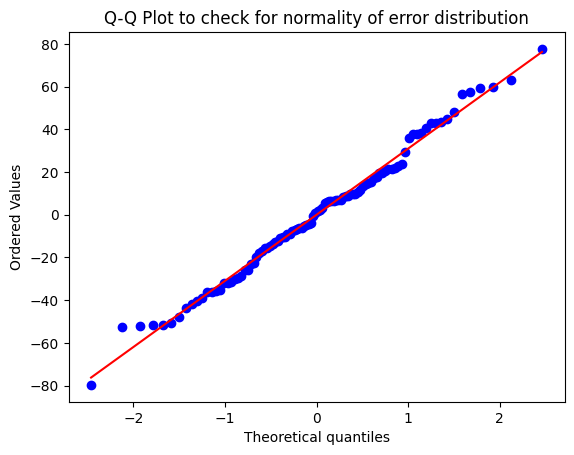

In [8]:
stats.probplot(y-y_hat, dist="norm", plot=plt)
plt.title('Q-Q Plot to check for normality of error distribution');

# Linear Regression with SGD

In [15]:
n = 100
np.random.seed(15)

b0, b1 = 8, 3.2
e = np.random.normal(0,30, n)

X = np.random.uniform(0, 100, n).reshape(-1,1)
y = b0 + b1*X[:, 0] + e

Completed 72 / 1000 epochs w tolerance: 9.04e-07
92844.05820217279 897978.9817110274 0.8966077602114185
R2: 89.7%
[163.41875341  89.57860423]


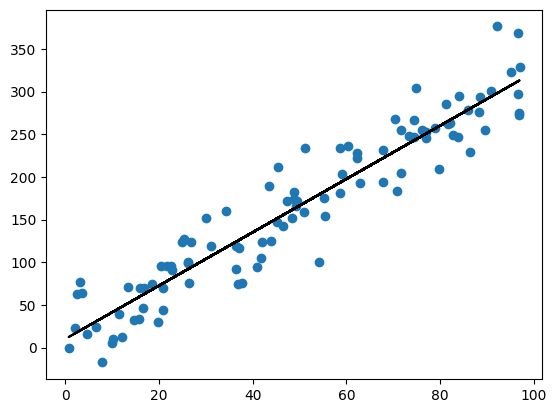

In [16]:
lrsgd = LinearRegression(intercept=True, scale=True, regularization='ridge')
lrsgd.fit(X, y, epochs=1000, lr=0.001)
y_hat = lrsgd.predict(X)
lrsgd.evaluate(y, y_hat)
print(lrsgd.b)

plt.plot(X, y, marker='o', linestyle='')
plt.plot(X, y_hat, marker='', color='k', linestyle='-');

In [17]:
X_new = np.hstack([X, np.random.rand(100,1)])

In [19]:
lrsgd = LinearRegression(intercept=True, scale=True, regularization='lasso')
lrsgd.fit(X_new, y, epochs=1000, lr=0.001)
y_hat = lrsgd.predict(X)
lrsgd.evaluate(y, y_hat)
lrsgd.b

Completed 74 / 1000 epochs w tolerance: 5.15e-07
97987.17995727948 897978.9817110274 0.8908803190798824
R2: 89.1%


array([ 1.63598029e+02,  8.96840946e+01, -3.83868977e-02])

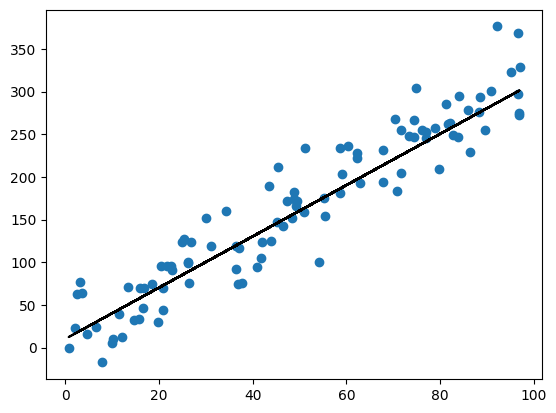

In [24]:
plt.plot(X, y, marker='o', linestyle='')
plt.plot(X_new[:, 0], y_hat, marker='', color='k', linestyle='-');